# Business Understanding
Untuk memahami faktor-faktor apa yang memengaruhi keputusan pelanggan untuk berhenti berlangganan (churn) atau tetap berlangganan.
yang memungkinkan perusahaan untuk mengidentifikasi pola perilaku yang berkaitan dengan churn dan mengambil tindakan yang tepat untuk mempertahankan pelanggan yang ada dan mencegah churn di masa depan. Dengan demikian, tujuan dari analisis ini adalah untuk mengembangkan pemahaman yang lebih dalam tentang perilaku pelanggan dan faktor-faktor yang mempengaruhi keputusan mereka untuk tetap menjadi pelanggan atau berhenti berlangganan.

# Data Understanding

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [41]:
df = pd.read_csv('/content/drive/MyDrive/FGA - Binar Academy/Dataset/Data Train.csv')
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


### Deskripsi Kolom
- **state**: Nama negara bagian tempat pelanggan berada.
- **account_length**: Jumlah hari pelanggan telah menjadi anggota.
- **area_code**: Kode area tempat nomor telepon pelanggan berada.
- **international_plan**: Menunjukkan apakah pelanggan telah berlangganan paket rencana internasional (Yes/No).
- **voice_mail_plan**: Menunjukkan apakah pelanggan telah berlangganan paket voicemail (Yes/No).
- **number_vmail_messages**: Jumlah pesan voicemail yang diterima oleh pelanggan.
- **total_day_minutes**: Total menit yang digunakan pelanggan selama periode siang hari.
- **total_day_calls**: Total panggilan yang dilakukan pelanggan selama periode siang hari.
- **total_day_charge**: Total biaya panggilan pelanggan selama periode siang hari.
- **total_eve_minutes**: Total menit yang digunakan pelanggan selama periode malam hari.
- **total_eve_calls**: Total panggilan yang dilakukan pelanggan selama periode malam hari.
- **total_eve_charge**: Total biaya panggilan pelanggan selama periode malam hari.
- **total_night_minutes**: Total menit yang digunakan pelanggan selama periode malam hari.
- **total_night_calls**: Total panggilan yang dilakukan pelanggan selama periode malam hari.
- **total_night_charge**: Total biaya panggilan pelanggan selama periode malam hari.
- **total_intl_minutes**: Total menit panggilan internasional yang digunakan pelanggan.
- **total_intl_calls**: Total panggilan internasional yang dilakukan pelanggan.
- **total_intl_charge**: Total biaya panggilan internasional yang dikenakan kepada pelanggan.
- **number_customer_service_calls**: Jumlah panggilan layanan pelanggan yang dilakukan oleh pelanggan.
- **churn**: Menunjukkan apakah pelanggan churn atau tidak (Yes/No).


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [43]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [44]:
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [45]:
df.duplicated().sum()

0

In [46]:
df.nunique()

state                              51
account_length                    215
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              46
total_day_minutes                1843
total_day_calls                   120
total_day_charge                 1843
total_eve_minutes                1773
total_eve_calls                   123
total_eve_charge                 1572
total_night_minutes              1757
total_night_calls                 128
total_night_charge                992
total_intl_minutes                168
total_intl_calls                   21
total_intl_charge                 168
number_customer_service_calls      10
churn                               2
dtype: int64

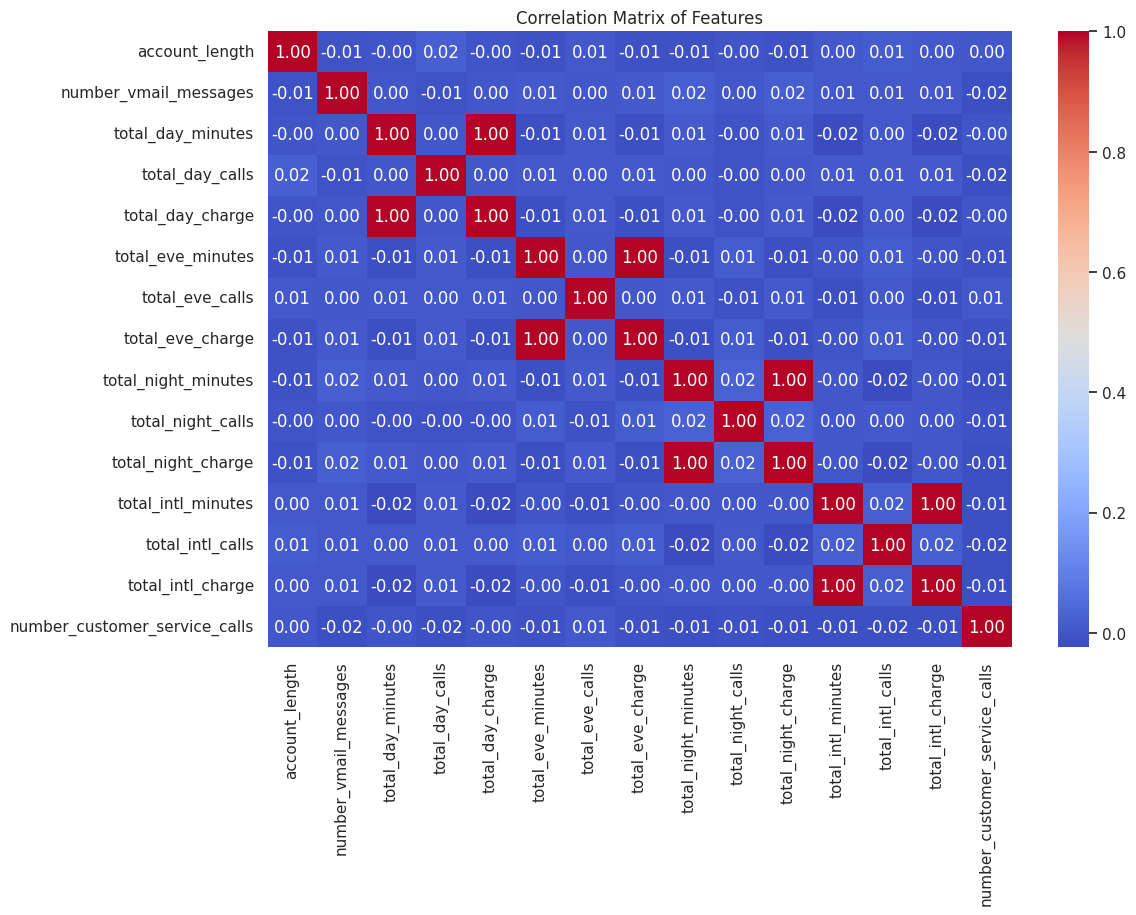

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung matriks korelasi antar fitur
feature_correlation_matrix = df.corr(numeric_only=True)

# Plot heatmap korelasi antar fitur
plt.figure(figsize=(12, 8))
sns.heatmap(feature_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

Fitur-fitur yang memiliki korelasi yang sangat tinggi dengan fitur lainnya :

- 'total_day_minutes' dan 'total_day_charge'
- 'total_eve_minutes' dan 'total_eve_charge'
- 'total_night_minutes' dan 'total_night_charge'
- 'total_intl_minutes' dan 'total_intl_charge'

Fitur biaya panggilan dihasilkan dari informasi jumlah menit yang digunakan dalam setiap periode waktu, sehingga fitur biaya panggilan dianggap redundan.

Oleh karena itu, kami memilih untuk **menghapus** fitur :
- **'total_day_charge'**
- **'total_eve_charge'**
- **'total_night_charge'**
- **total_intl_charge**

agar:
- Mengurangi dimensi dataset,
- Menghilangkan informasi yang tidak diperlukan, dan
- Mempertahankan informasi asli yang diwakili oleh jumlah menit yang digunakan.

In [48]:
df.drop(['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge'], axis=1, inplace=True)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,348.5,108,212.6,118,7.5,7,3,no


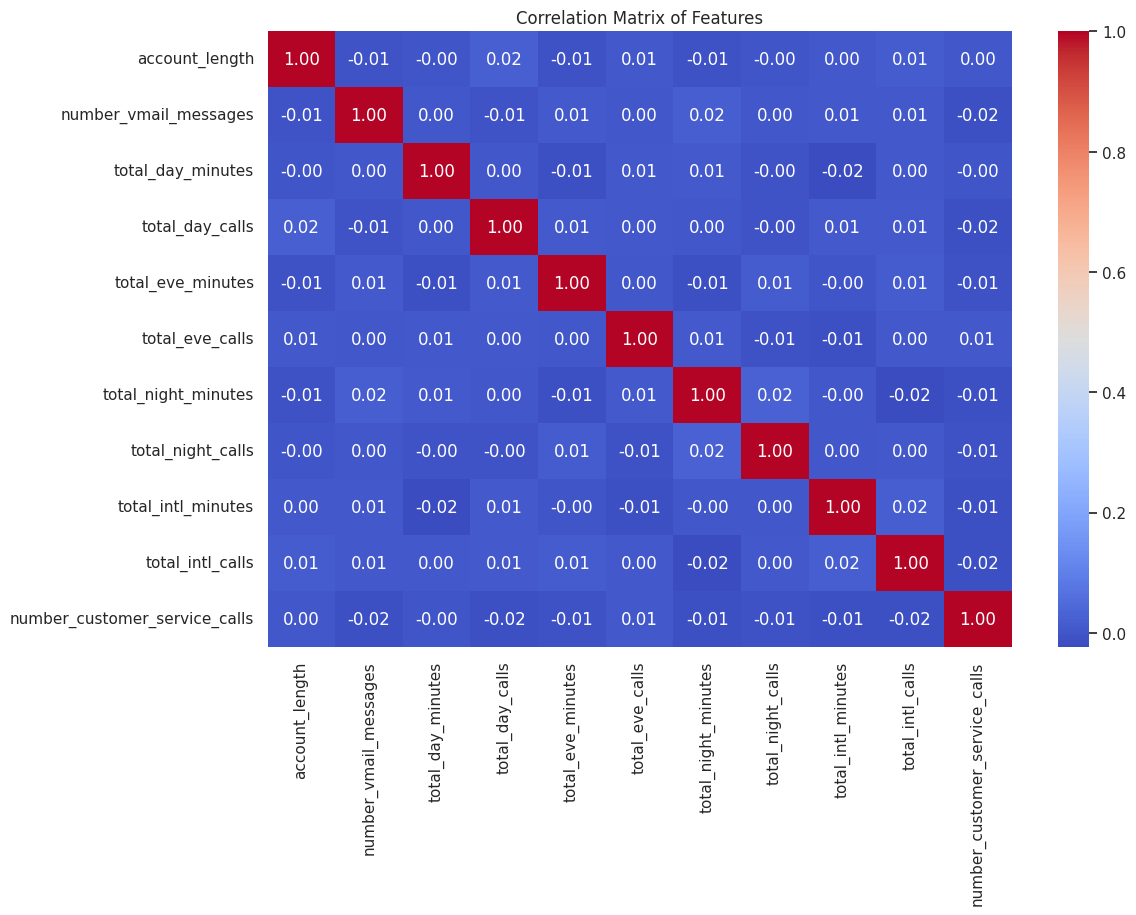

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung matriks korelasi antar fitur
feature_correlation_matrix = df.corr(numeric_only=True)

# Plot heatmap korelasi antar fitur
plt.figure(figsize=(12, 8))
sns.heatmap(feature_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

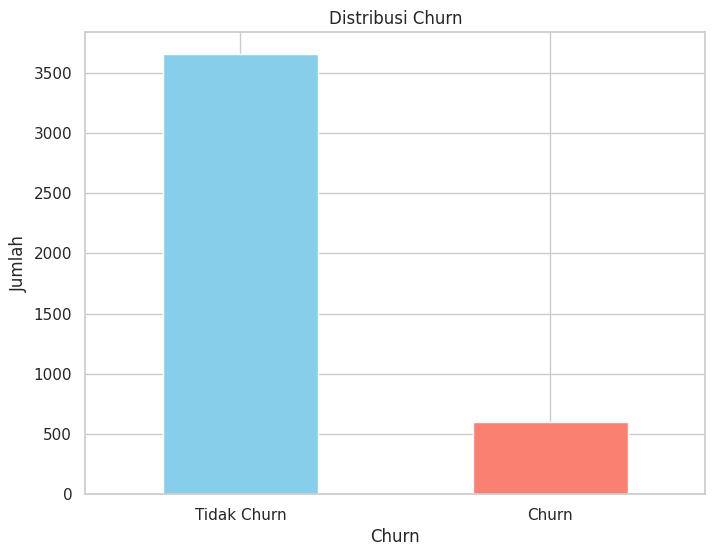

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df['churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Churn')
plt.xlabel('Churn')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.xticks(ticks=[0, 1], labels=['Tidak Churn', 'Churn'])
plt.show()

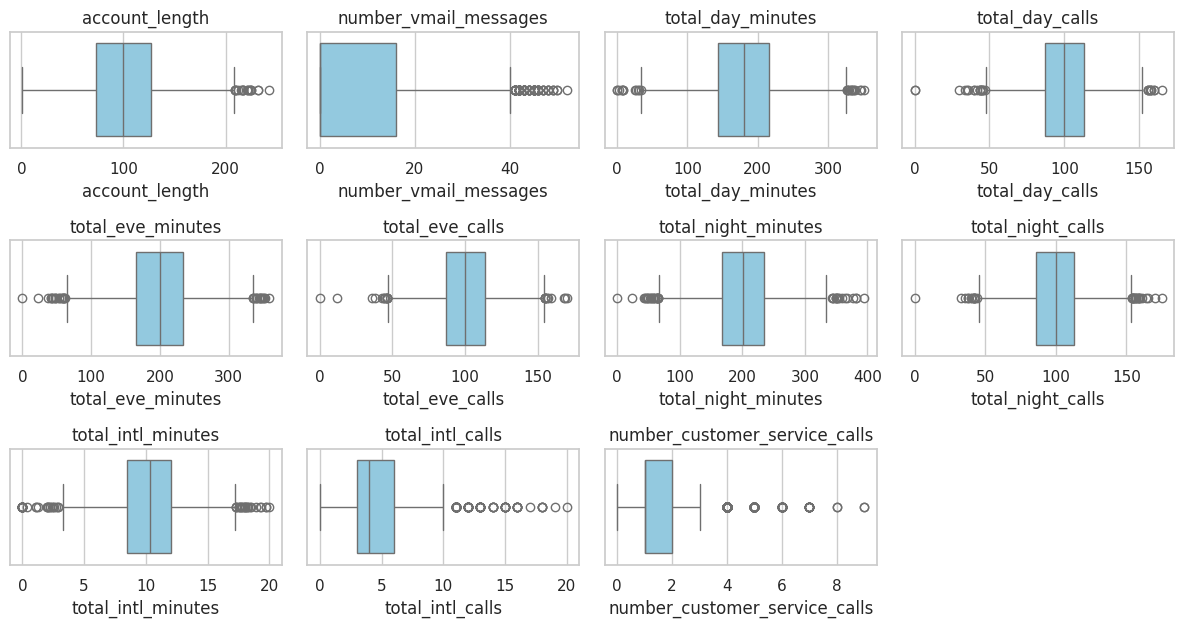

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

for i, column in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(column)

plt.tight_layout()
plt.show()

In [52]:
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Outliers di kolom '{column}': {outliers.shape[0]}")

Outliers di kolom 'account_length': 20
Outliers di kolom 'number_vmail_messages': 86
Outliers di kolom 'total_day_minutes': 25
Outliers di kolom 'total_day_calls': 28
Outliers di kolom 'total_eve_minutes': 34
Outliers di kolom 'total_eve_calls': 24
Outliers di kolom 'total_night_minutes': 37
Outliers di kolom 'total_night_calls': 33
Outliers di kolom 'total_intl_minutes': 62
Outliers di kolom 'total_intl_calls': 100
Outliers di kolom 'number_customer_service_calls': 335


Disini saya mempertahankan outlier karena masih dianggap normal dan bisa saja benar terjadi dan dapat membantu mencerminkan variasi alami dalam dataset.

### Check Categorical Feature

In [53]:
for col in df.select_dtypes(include='object').columns.tolist():
    print(df[col].value_counts(normalize=True)*100)
    print('\n')

WV    3.270588
MN    2.541176
ID    2.494118
AL    2.376471
VA    2.352941
OR    2.329412
TX    2.305882
UT    2.282353
NY    2.258824
NJ    2.258824
WY    2.235294
OH    2.235294
WI    2.211765
MA    2.094118
ME    2.094118
CT    2.070588
RI    2.047059
MI    2.047059
KS    2.047059
MD    2.023529
VT    2.023529
KY    2.000000
NV    1.952941
IN    1.952941
MS    1.929412
WA    1.882353
NC    1.882353
MO    1.882353
DE    1.882353
CO    1.882353
MT    1.882353
IL    1.858824
TN    1.858824
NM    1.835294
OK    1.835294
NH    1.835294
HI    1.811765
AZ    1.811765
FL    1.788235
SD    1.764706
NE    1.717647
DC    1.694118
SC    1.694118
AR    1.670588
LA    1.623529
PA    1.576471
ND    1.576471
GA    1.505882
IA    1.458824
AK    1.435294
CA    0.917647
Name: state, dtype: float64


area_code_415    49.600000
area_code_408    25.552941
area_code_510    24.847059
Name: area_code, dtype: float64


no     90.682353
yes     9.317647
Name: international_plan, dtype: float64


no     73.835

Fitur yang sangat didominasi oleh salah satu nilai saja akan dibuang pada tahap ini yaitu kolom **'international_plan'**

In [54]:
df.drop('international_plan', axis=1, inplace=True)
df.head()

,state,account_length,area_code,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,OH,107,area_code_415,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,no
1,NJ,137,area_code_415,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,no
2,OH,84,area_code_408,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,no
3,OK,75,area_code_415,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,no
4,MA,121,area_code_510,yes,24,218.2,88,348.5,108,212.6,118,7.5,7,3,no


# Data Preparation

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import numpy as np

In [56]:
label_encoder = LabelEncoder()
df['churn'] = label_encoder.fit_transform(df['churn'])

In [57]:
X = df.drop(columns=['churn'])
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3400, 14), (850, 14), (3400,), (850,))

 - Membagi data dengan perbandingan 80% untuk data pelatihan dan 20% untuk data pengujian.
 - Parameter 'stratify=y' untuk memastikan distribusi kelas target yang seimbang di kedua set data pelatihan dan pengujian.

In [58]:
numerical_cols = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
                  'total_eve_minutes', 'total_eve_calls', 'total_night_minutes', 'total_night_calls',
                  'total_intl_minutes', 'total_intl_calls', 'number_customer_service_calls']

categorical_cols = ['state', 'area_code', 'voice_mail_plan']

# Preprocessing untuk data numerik
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing untuk data kategorikal
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Gabungkan preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Modeling

### Model Logistic Regression

In [64]:
# Pipeline untuk model regresi logistik
logistic_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', max_iter=1000, penalty='l2', class_weight='balanced'))
])

# Menambahkan parameter yang akan diuji
param_space_lr = {
    "classifier__C": np.logspace(-3, 3, 7),
    "classifier__fit_intercept": [True, False],
}

# Melatih model dengan teknik RandomizedSearchCV
model_lr = GridSearchCV(logistic_model, param_grid=param_space_lr, cv=3)

# Fitting model ke data pelatihan
model_lr.fit(X_train, y_train)

# Tampilkan hasil regresi logistik
print("Best Parameters (Logistic Regression):", model_lr.best_params_)
print("Training Accuracy (Logistic Regression):", model_lr.score(X_train, y_train))
print("Model Best Score (Logistic Regression):", model_lr.best_score_)
print("Test Accuracy (Logistic Regression):", model_lr.score(X_test, y_test))

Best Parameters (Logistic Regression): {'classifier__C': 0.1, 'classifier__fit_intercept': True}
Training Accuracy (Logistic Regression): 0.7302941176470589
Model Best Score (Logistic Regression): 0.7238208872513079
Test Accuracy (Logistic Regression): 0.7070588235294117


### Model XGBoost

In [66]:
# Pipeline untuk model XGBoost
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

# Menambahkan parameter yang akan diuji
param_space_xgb = {
    'classifier__n_estimators': [100, 500, 1000],
    'classifier__max_depth': [3, 5, 7],
    'classifier__gamma': [0, 0.1, 0.2]
}

# Melatih model dengan teknik GridSearchCV
model_xgb = GridSearchCV(xgb_model, param_grid=param_space_xgb, cv=3)

# Fitting model ke data pelatihan
model_xgb.fit(X_train, y_train)

# Tampilkan hasil XGBoost
print("Best Parameters (XGBoost):", model_xgb.best_params_)
print("Training Accuracy (XGBoost):", model_xgb.score(X_train, y_train))
print("Model Best Score (XGBoost):", model_xgb.best_score_)
print("Test Accuracy (XGBoost):", model_xgb.score(X_test, y_test))

Best Parameters (XGBoost): {'classifier__gamma': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 100}
Training Accuracy (XGBoost): 1.0
Model Best Score (XGBoost): 0.9261801764498636
Test Accuracy (XGBoost): 0.9305882352941176


# Evaluation

### Evaluation model Logistic Regresion

In [87]:
from sklearn.metrics import classification_report, confusion_matrix

# Prediksi label untuk data uji
y_pred_lr = model_lr.predict(X_test)

# Confusion matrix
print("\nConfusion Matrix Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lr))

# Evaluasi performa model
print("\nClassification Report Logistic Regression:")
print(classification_report(y_test, y_pred_lr))


Confusion Matrix Logistic Regression:
[[513 217]
 [ 32  88]]

Classification Report Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.70      0.80       730
           1       0.29      0.73      0.41       120

    accuracy                           0.71       850
   macro avg       0.61      0.72      0.61       850
weighted avg       0.85      0.71      0.75       850



### Evaluation model XGBoost

In [86]:
# Memprediksi dengan model XGBoost
y_pred_xgb = model_xgb.predict(X_test)

# Confusion matrix
print("\nConfusion Matrix XGBoost:")
print(confusion_matrix(y_test, y_pred_xgb))

# Evaluasi performa model
print("\nClassification Report XGBoost:")
print(classification_report(y_test, y_pred_xgb))


Confusion Matrix XGBoost:
[[723   7]
 [ 52  68]]

Classification Report XGBoost:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       730
           1       0.91      0.57      0.70       120

    accuracy                           0.93       850
   macro avg       0.92      0.78      0.83       850
weighted avg       0.93      0.93      0.92       850



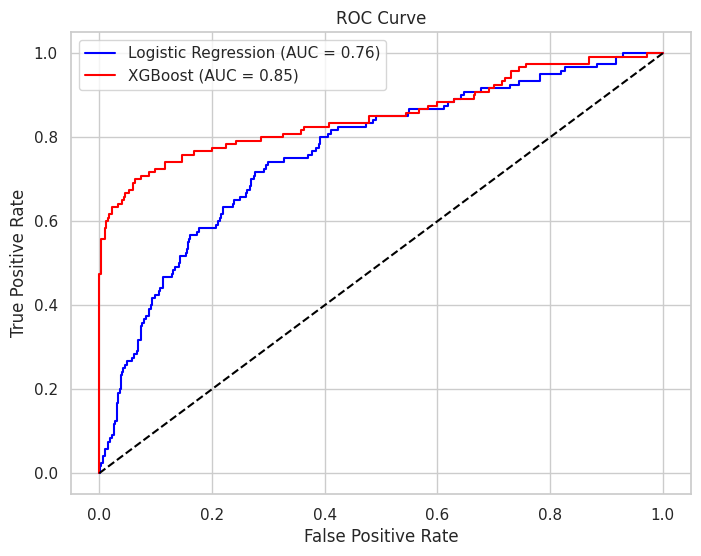

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Menghitung probabilitas prediksi untuk kedua model
y_proba_lr = model_lr.predict_proba(X_test)[:, 1]
y_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

# Menghitung nilai AUC untuk kedua model
auc_lr = roc_auc_score(y_test, y_proba_lr)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)

# Menghitung kurva ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

# Plot kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='blue')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})', color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Deployment

In [76]:
df_test = pd.read_csv("/content/drive/MyDrive/FGA - Binar Academy/Dataset/Data Test.csv")
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [79]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [80]:
# Memprediksi churn menggunakan model regresi logistik
y_pred_lr = model_lr.predict(df_test)

# Memprediksi churn menggunakan model XGBoost
y_pred_xgb = model_xgb.predict(df_test)

# Menambahkan hasil prediksi sebagai kolom baru pada DataFrame df_test
df_test['Churn Prediction (Logistic Regression)'] = y_pred_lr
df_test['Churn Prediction (XGBoost)'] = y_pred_xgb

# Menampilkan lima baris pertama DataFrame df_test yang telah diperbarui
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn Prediction (Logistic Regression),Churn Prediction (XGBoost)
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,1,1
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,1,0
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3,1,0


In [91]:
# Save hasil prediksi
df_test.to_csv('/content/drive/MyDrive/FGA - Binar Academy/Dataset/predictions.csv', index=False)